<a href="https://colab.research.google.com/github/andrewpkitchin/time-series/blob/main/marco_peixeiro_chapter_one_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dependacies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def auto_r_one(n, y_0, mu, sigma, coeff, seed):
# Parameters
# Number of points in the time series
# Initial value of the series
# Mean of the error term
# Standard deviation of the error term

  # Initialize the series
  y = np.zeros(n)
  y[0] = y_0

  # Generate the time series
  np.random.seed(seed)  # For reproducibility
  for t in range(1, n):
    y[t] = coeff * y[t-1] + np.random.normal(mu, sigma)
  return y

def auto_r_one_plot(y, coeff):
    # Plotting
    plt.figure(figsize=(14, 8))
    plt.plot(y, label='$y_t = {{{}}}y_{{t-1}} + e_t$'.format(coeff))
    plt.title('Time Series: $y_t = {{{}}}y_{{t-1}} + e_t$'.format(coeff))
    plt.xlabel('Time ($t$)')
    plt.ylabel('$y_t$')
    plt.legend()
    plt.grid(True)
    plt.show()

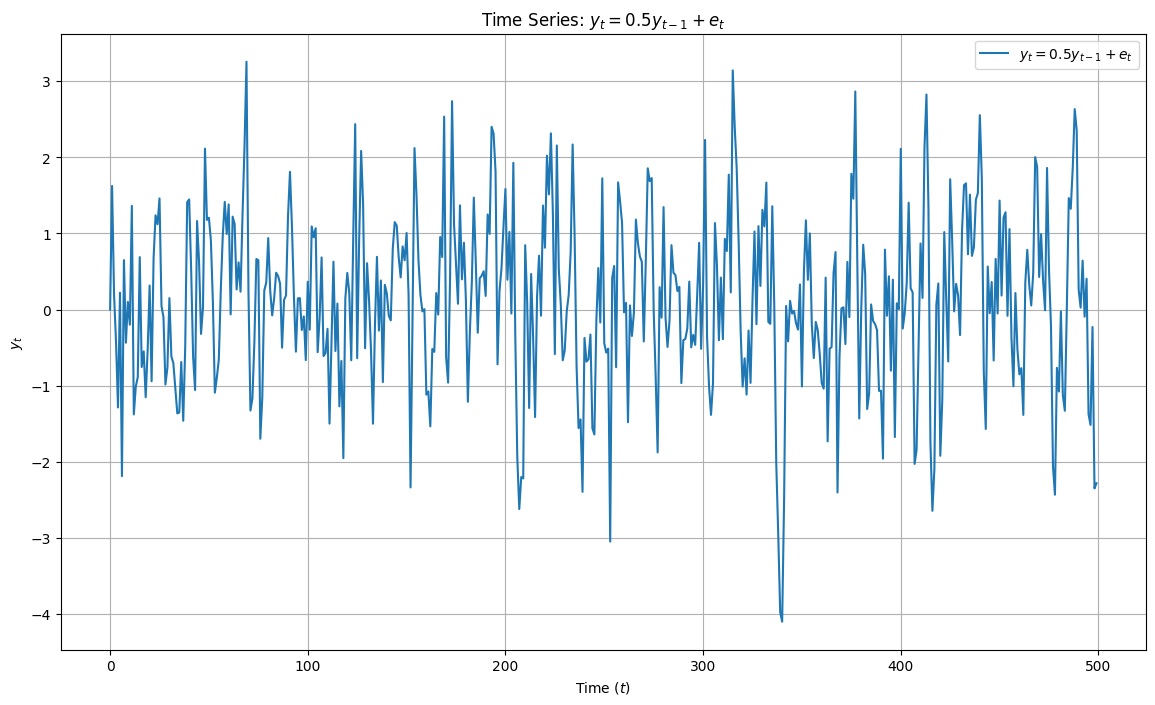

In [4]:
auto_r_one_plot(auto_r_one(500, 0, 0, 1, 0.5, 1), 0.5)

The augemented Dickey-Fuller (ADF) test helps us determine if a time series is stationary by testing the presence of a unit root. If a unit root is present, the time series is not stationary.

The test (from statsmodels) returns a test statistic and a p-value.

If the test for a time series returns a small p-value (typically we are looking for below 0.05 or 0.01) then we can reject the null hypothesis that at unit root is present. We are typically looking for a big negative number from the test statistic.

In [12]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(auto_r_one(500, 0, 0, 1, 0.5, 1))

print(f"ADF Statistic: {ADF_result[0]}")

print(f"p-value: {ADF_result[1]}")

ADF Statistic: -13.238226623830435
p-value: 9.284545669689237e-25


In [13]:
ADF_result = adfuller(auto_r_one(500, 0, 0, 1, 1, 1))

print(f"ADF Statistic: {ADF_result[0]}")

print(f"p-value: {ADF_result[1]}")

ADF Statistic: -1.375701034137164
p-value: 0.5938683312006954


We can see that when the coefficeint of the lagged term is 1 we accept the null hypothesis and when it is 0.5 we reject this.

In [30]:
ar_one_example = auto_r_one(500, 0, 0, 1, 1, 1)

differenced_random_walk = np.diff(ar_one_example)

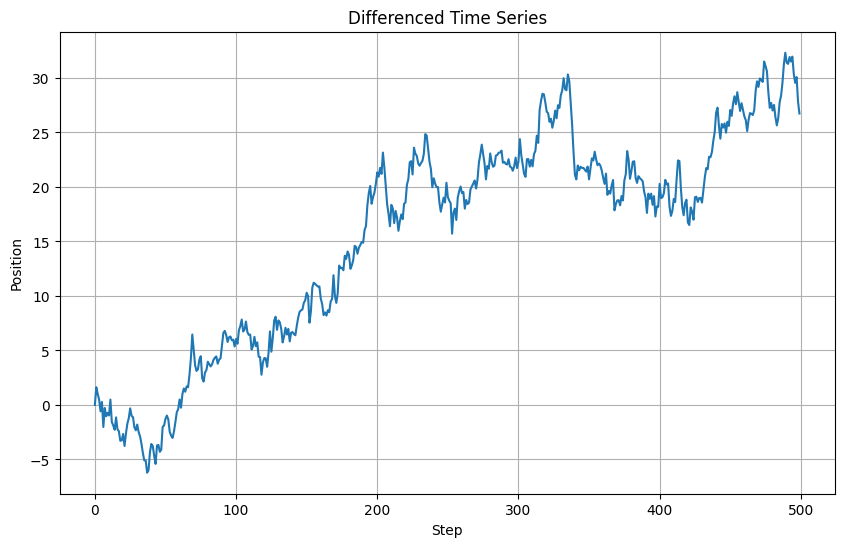

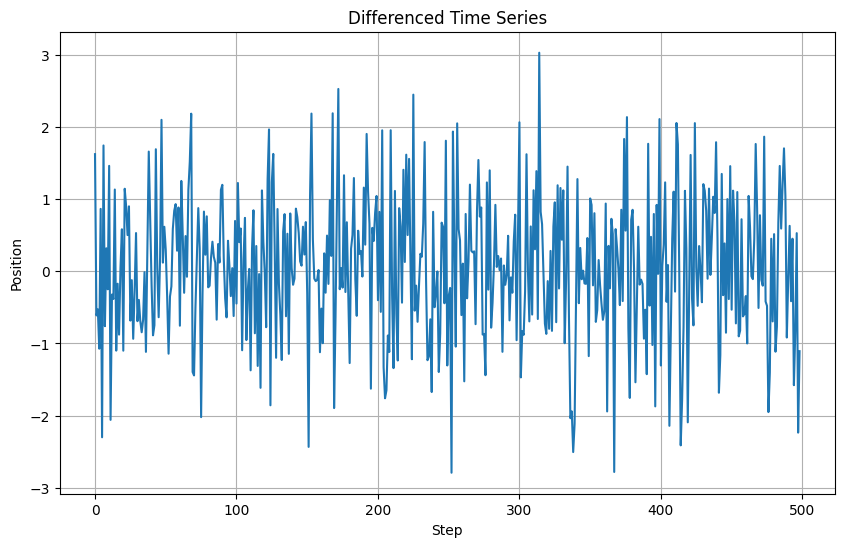

In [31]:
# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(ar_one_example, linestyle='-')
plt.title('Differenced Time Series')
plt.xlabel('Step')
plt.ylabel('Position')
plt.grid(True)

# Show the plot
plt.show()


# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(differenced_random_walk, linestyle='-')
plt.title('Differenced Time Series')
plt.xlabel('Step')
plt.ylabel('Position')
plt.grid(True)

# Show the plot
plt.show()

In [32]:
ADF_result = adfuller(differenced_random_walk)

print(f"ADF Statistic: {ADF_result[0]}")

print(f"p-value: {ADF_result[1]}")

ADF Statistic: -22.71697075487162
p-value: 0.0


In [36]:
from statsmodels.graphics.tsaplots import plot_acf

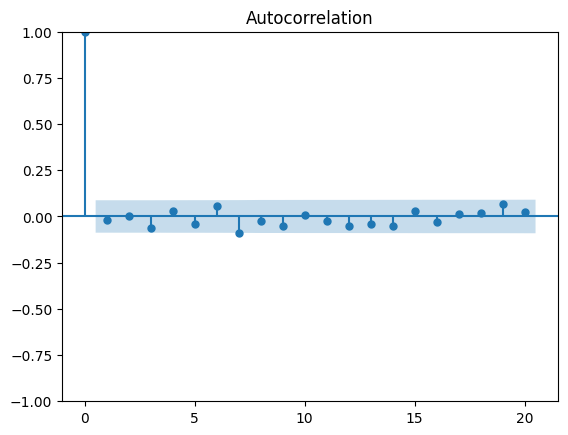

In [44]:
plot_acf(differenced_random_walk, lags = 20);

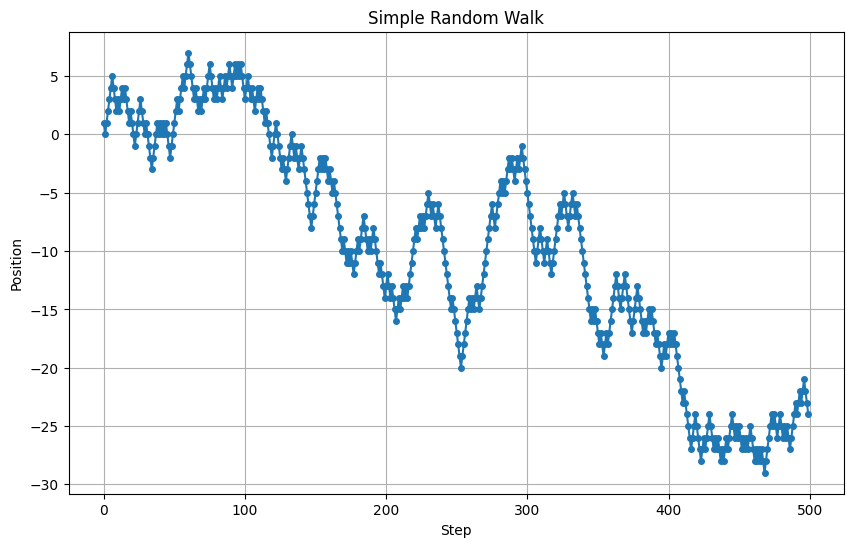

In [45]:
# Coin toss random walk

# Setting the number of steps
n_steps = 500

# Generate random steps (+1 or -1) with equal probability
steps = np.random.choice([-1, 1], size=n_steps)

# Compute the position after each step
position = np.cumsum(steps)

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(position, marker='o', linestyle='-', markersize=4)
plt.title('Simple Random Walk')
plt.xlabel('Step')
plt.ylabel('Position')
plt.grid(True)

# Show the plot
plt.show()

In [47]:
ADF_result = adfuller(position)

print(f"ADF Statistic: {ADF_result[0]}")

print(f"p-value: {ADF_result[1]}")

ADF Statistic: -0.9712998263796611
p-value: 0.7635876015357801


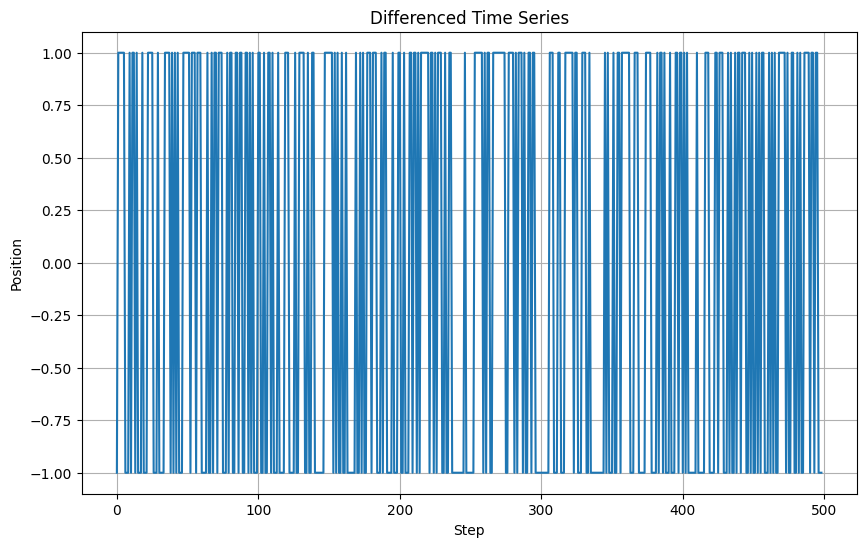

In [49]:
differenced_coin_toss = np.diff(position)

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(differenced_coin_toss, linestyle='-')
plt.title('Differenced Time Series')
plt.xlabel('Step')
plt.ylabel('Position')
plt.grid(True)

# Show the plot
plt.show()

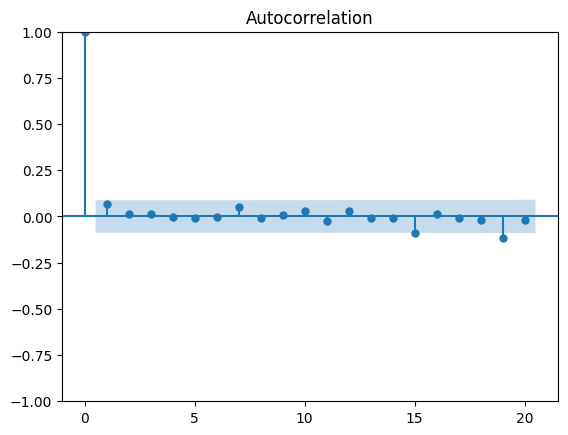

In [50]:
plot_acf(differenced_coin_toss, lags = 20);

In [51]:
ADF_result = adfuller(differenced_coin_toss)

print(f"ADF Statistic: {ADF_result[0]}")

print(f"p-value: {ADF_result[1]}")

ADF Statistic: -20.844442069086558
p-value: 0.0
